In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

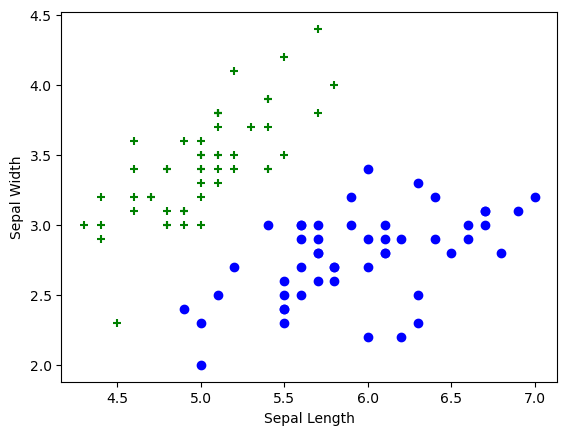

In [15]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = "green", marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = "blue")

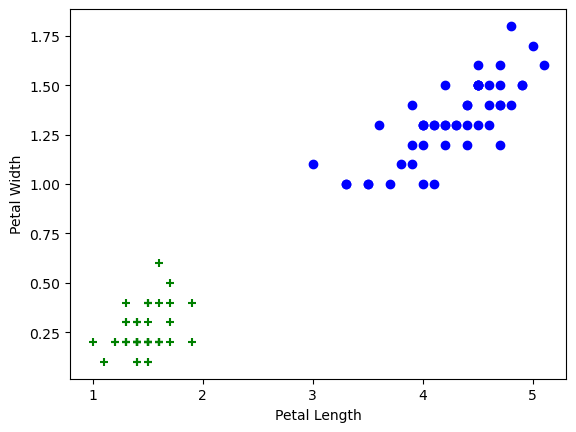

In [16]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = "green", marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = "blue")

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train), len(X_test))

120 30


In [19]:
from sklearn.neighbors import KNeighborsClassifier
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))

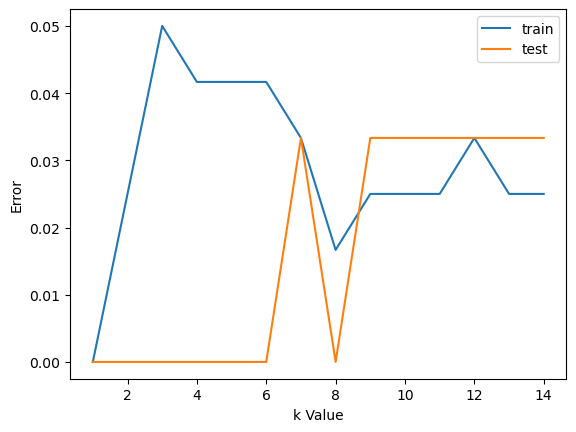

In [20]:
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [21]:
knn= KNeighborsClassifier(n_neighbors=8)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [23]:
knn.score(X_test, y_test)

1.0

In [25]:
knn.predict([[4.8,3.0,1.5,0.3]])

/Users/jeffreyjj/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Text(58.222222222222214, 0.5, 'Truth')

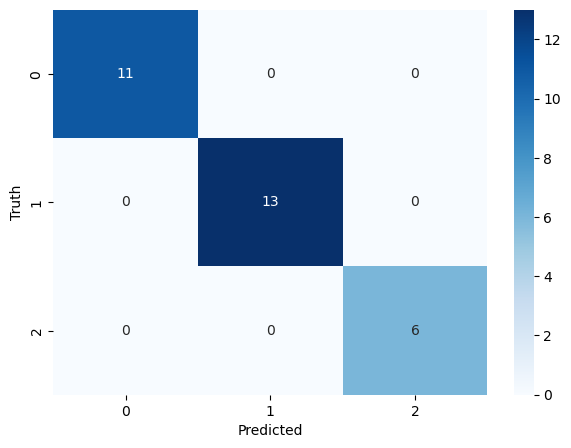

In [32]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot = True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


# Blobs Classification Problem

In [34]:
from sklearn.datasets import make_blobs

In [35]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2)

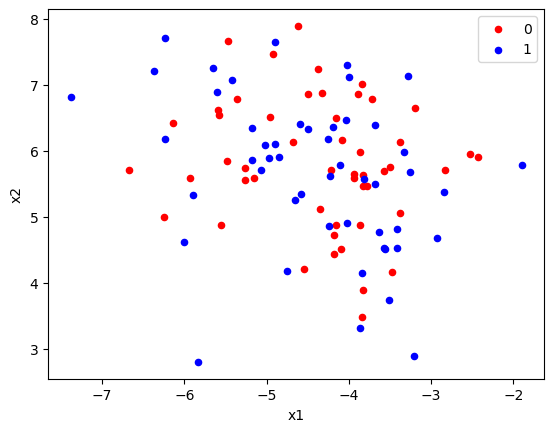

In [36]:
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
plt.show()

# Moons Classification Problem

In [37]:
from sklearn.datasets import make_moons

In [38]:
X, y = make_moons(n_samples=100, noise=0.5)

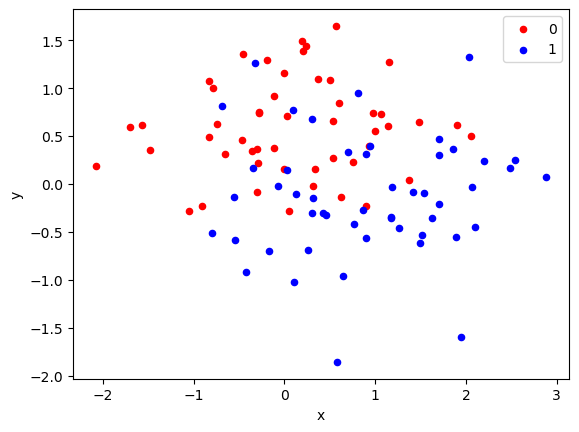

In [40]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# Circles Classification Problem

In [41]:
from sklearn.datasets import make_circles

In [42]:
X, y = make_circles(n_samples=100, noise=0.05)

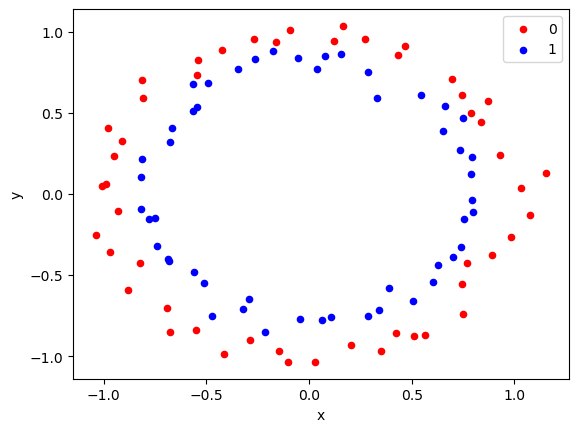

In [43]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

# Regression Test Problems

In [44]:
from sklearn.datasets import make_regression

In [45]:
X, y = make_regression(n_samples=100, n_features=1, noise=20)

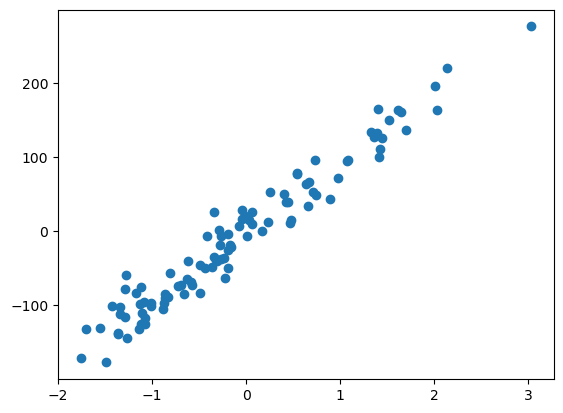

In [46]:
plt.scatter(X,y)
plt.show()

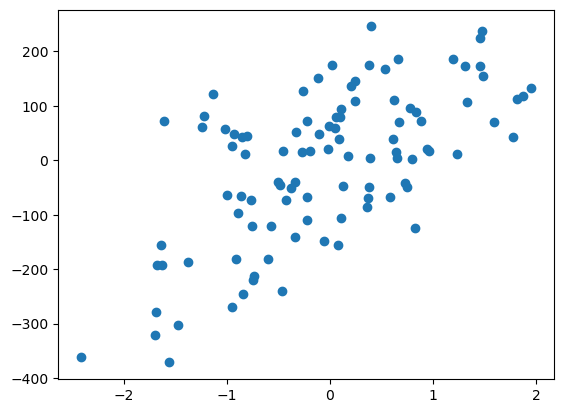

In [47]:
X, y = make_regression(n_samples=100, n_features=1, noise=100)
plt.scatter(X,y)
plt.show()